# Conditional Graph

In [7]:
%pip install langgraph
%pip install IPython

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [10]:
def adder(state: AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state['operation'] == "+":
        return "addition_operation" # return the edge
    
    elif state['operation'] == '-':
        return 'subtraction_operation'

In [13]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state) # passthrough function

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", # source
    decide_next_node, 
    {
        "addition_operation": "add_node",
        "substraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

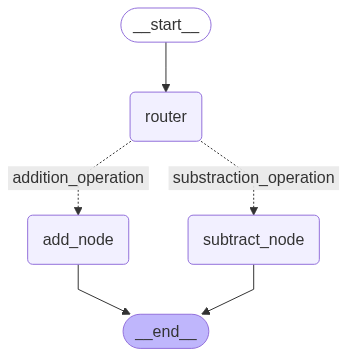

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state_1 = AgentState(number1=10, operation="+", number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}
